# <center>待完成</center>

In [1]:
import numpy as np

In [2]:
def load_data_set(file_name):
    return np.loadtxt(file_name, dtype=np.float64)

In [21]:
def dist_eclud(vec_a, vec_b):
    return np.sqrt(np.sum(np.power(vec_a-vec_b, 2)))

In [4]:
import cv2

In [9]:
help(cv2.minMaxLoc)

Help on built-in function minMaxLoc:

minMaxLoc(...)
    minMaxLoc(src[, mask]) -> minVal, maxVal, minLoc, maxLoc
    .   @brief Finds the global minimum and maximum in an array.
    .   
    .   The function cv::minMaxLoc finds the minimum and maximum element values and their positions. The
    .   extremums are searched across the whole array or, if mask is not an empty array, in the specified
    .   array region.
    .   
    .   The function do not work with multi-channel arrays. If you need to find minimum or maximum
    .   elements across all the channels, use Mat::reshape first to reinterpret the array as
    .   single-channel. Or you may extract the particular channel using either extractImageCOI , or
    .   mixChannels , or split .
    .   @param src input single-channel array.
    .   @param minVal pointer to the returned minimum value; NULL is used if not required.
    .   @param maxVal pointer to the returned maximum value; NULL is used if not required.
    .   @param m

In [17]:
def rand_cnt(data_set, k):
    n = np.shape(data_set)[1]
    centroids = np.zeros((k, n))
    for i in range(n):
        col_min, col_max, *_ = cv2.minMaxLoc(data_set[:, i])
        centroids[:, i] = np.random.uniform(col_min, col_max, k).T
    return centroids

In [11]:
data_mat = load_data_set("testSet.txt")

In [19]:
rand_cnt(data_mat, 2)

array([[-2.30751894, -3.89110921],
       [ 0.55624723,  2.70148825]])

In [22]:
dist_eclud(data_mat[0], data_mat[1])

5.184632816681332

In [23]:
def k_means(data_set, k, dist_meas=dist_eclud, create_cent=rand_cnt):
    m = np.shape(data_set)[0]
    cluster_assment = np.zeros((m, 2))
    centroids = create_cent(data_set, k)
    cluster_changed = True
    while cluster_changed:
        cluster_changed = False
        for i in range(m):
            min_dist = np.inf
            min_index = -1
            for j in range(k):
                dist_ji = dist_meas(centroids[j, :], data_set[i, :])
                if dist_ji<min_dist:
                    min_dist = dist_ji
                    min_index = j
            if cluster_assment[i, 0]!=min_index:
                cluster_changed = True
            cluster_assment[i, :] = min_index, min_dist**2
        print(centroids)
        for cent in range(k):
            pts_in_clust = data_set[cluster_assment[:, 0]==cent]
            centroids[cent, :] = np.mean(pts_in_clust, axis=0)
    return centroids, cluster_assment

In [24]:
my_centroids, clust_assing = k_means(data_mat, 4)

[[ 3.28994119  1.35051368]
 [ 0.48743728 -2.37769021]
 [-0.67222726  2.06057181]
 [-2.68656241 -2.57683429]]
[[ 3.16042967  2.07012938]
 [ 2.19454347 -3.07604306]
 [-1.94392522  2.96291883]
 [-3.53973889 -2.89384326]]
[[ 2.6265299   3.10868015]
 [ 2.65077367 -2.79019029]
 [-2.46154315  2.78737555]
 [-3.53973889 -2.89384326]]


In [28]:
my_centroids.shape

(4, 2)

In [25]:
from matplotlib import pyplot as plt

In [26]:
%matplotlib inline

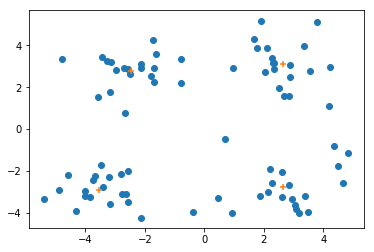

In [29]:
plt.figure()
plt.scatter(data_mat[:, 0], data_mat[:, 1])
plt.scatter(my_centroids[:, 0], my_centroids[:, 1], marker='+')

In [ ]:
def bi_k_means(data_set, k, dist_meas=dist_eclud):
    m = np.shape(data_set)[0]
    cluster_assment = np.zeros((M, 2))
    centroids = np.mean(data_set, axis=0)
    for j in range(m):
        cluster_assment[j, :] = dist_meas(centroids, data_set[j, :])**2
    while len(centroids)<k:
        lowest_sse = np.inf
        for i in range(len(centroids)):
            pts_in_cur_cluster = data_set(cluster_assment[:, 0]==i)
            centroid_mat, split_clus_ass = k_means(pts_in_cur_cluster, 2, dist_meas)
            sse_split = np.sum(split_clus_ass[:, 1])
            sse_not_split = np.sum(cluster_assment[cluster_assment[:, 0]=i, 1])
            print("sse_split, and sse_not_split: "+str(sse_split)+" "+str(sse_not_split))
            if (sse_split+sse_not_split)<lowest_sse:
                best_cent_to_split = i
                best_new_cents = centroid_mat
                best_clust_ass = split_clus_ass